# Data Analysis and Visualisation
The dataset for the project can be downloaded from this [link](https://www.kaggle.com/shivanandmn/multilabel-classification-dataset?select=train.csv).

Data undertsanding and data visualisation are the first and foremost steps for any machine learning project.


In [1]:
import pandas as pd

In [3]:
from google.colab import drive
import os

In [4]:
drive.mount('/gdrive')
os.listdir('/gdrive/MyDrive/data')

Mounted at /gdrive


['test.csv',
 'sample_submission.csv',
 'train.csv',
 'saved_models',
 'training_resultsSimpleBertForSequenceClassification.json',
 'training_resultsModifiedBertForSequenceClassification.json',
 'utils.py',
 'trainer.py',
 'bert.py',
 'training_results_ModifiedBertForSequenceClassification.json',
 'training_results_ModifiedBertForSequenceClassification_1.json',
 'training_results_BertToSingleLayerNeuralNetwork_1.json',
 'training_results_SimpleBertForSequenceClassification_1.json',
 'preprocessing_exp',
 'tokenizer_exp',
 'val.csv',
 'data.csv',
 'hyperparameter_exp',
 'training_exp',
 'final']

In [5]:
dataset = pd.read_csv("/gdrive/MyDrive/data/train.csv")
dataset.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0



## Counting the number of abstracts in each label
*   Getting the number of abstracts in each label.
*   From the data below its clear that the dataset is imbalanced because each label is unevenly distributed.




In [6]:
dataset[['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']].sum()

Computer Science        8594
Physics                 6013
Mathematics             5618
Statistics              5206
Quantitative Biology     587
Quantitative Finance     249
dtype: int64



### Plotting the above data into a bar plot clearly shows that computer science has the highest number of abstracts.



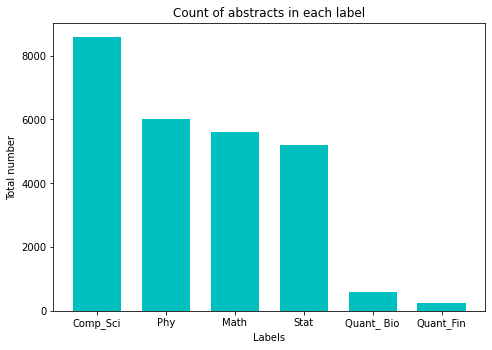

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['Comp_Sci', 'Phy', 'Math', 'Stat', 'Quant_ Bio', 'Quant_Fin']
y = dataset[['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']].sum()
ax.bar(x, y, color='c', width=0.7)
plt.xlabel('Labels')
plt.ylabel('Total number')
plt.title('Count of abstracts in each label')
plt.show()

## Counting the numbers of abstracts belonging to multiple labels


*   Counting abstracts with 1 label, 2 label, 3 label and 4 label.
*   From the data below it shows that majority of the abstracts have single label.



In [8]:
dataset['sum'] = dataset[['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']].sum(axis=1)

In [9]:
dataset.head(2)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,sum
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,1
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,1


In [10]:
count_one = dataset[dataset['sum'] == 1].count()
count_two = dataset[dataset['sum'] == 2].count()
count_three = dataset[dataset['sum'] == 3].count()
count_four = dataset[dataset['sum'] == 4].count()

In [11]:
count_one[1]

15928

In [12]:
count_sum = [count_one[1], count_two[1], count_three[1], count_four[1]]
count_sum

[15928, 4793, 251, 0]

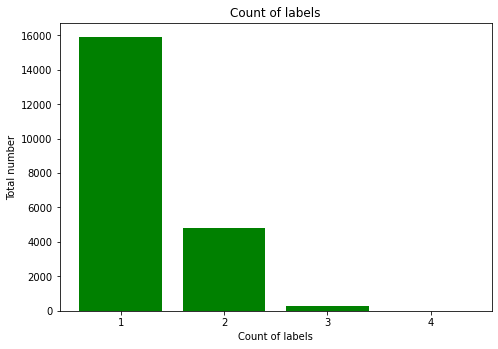

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ["1","2","3","4"]
y = count_sum
ax.bar(x, y, color='g', width=0.8)
plt.xlabel('Count of labels')
plt.ylabel('Total number')
plt.title('Count of labels')
plt.show()

## Counting the abstracts with two labels.

In [14]:
dataset['comp_phy'] = dataset[['Computer Science', 'Physics']].sum(axis=1)
dataset['comp_math'] = dataset[['Computer Science', 'Mathematics']].sum(axis=1)
dataset['comp_stat'] = dataset[['Computer Science', 'Statistics']].sum(axis=1)
dataset['comp_bio'] = dataset[['Computer Science', 'Quantitative Biology']].sum(axis=1)
dataset['comp_fin'] = dataset[['Computer Science', 'Quantitative Finance']].sum(axis=1)
dataset['phy_math'] = dataset[['Physics', 'Mathematics']].sum(axis=1)
dataset['phy_stat'] = dataset[['Physics', 'Statistics']].sum(axis=1)
dataset['phy_bio'] = dataset[['Physics', 'Quantitative Biology']].sum(axis=1)
dataset['phy_fin'] = dataset[['Physics', 'Quantitative Finance']].sum(axis=1)
dataset['math_stat'] = dataset[['Mathematics', 'Statistics']].sum(axis=1)
dataset['math_bio'] = dataset[['Mathematics', 'Quantitative Biology']].sum(axis=1)
dataset['math_fin'] = dataset[['Mathematics', 'Quantitative Finance']].sum(axis=1)
dataset['stat_bio'] = dataset[['Statistics', 'Quantitative Biology']].sum(axis=1)
dataset['stat_fin'] = dataset[['Statistics', 'Quantitative Finance']].sum(axis=1)
dataset['bio_fin'] = dataset[['Quantitative Finance', 'Quantitative Finance']].sum(axis=1)
dataset.head(2)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,sum,comp_phy,comp_math,comp_stat,comp_bio,comp_fin,phy_math,phy_stat,phy_bio,phy_fin,math_stat,math_bio,math_fin,stat_bio,stat_fin,bio_fin
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0


In [15]:
count_comp_phy = dataset[dataset['comp_phy'] == 2].count()
count_comp_math = dataset[dataset['comp_math'] == 2].count()
count_comp_stat = dataset[dataset['comp_stat'] == 2].count()
count_comp_bio = dataset[dataset['comp_bio'] == 2].count()
count_comp_fin = dataset[dataset['comp_fin'] == 2].count()
count_phy_math = dataset[dataset['phy_math'] == 2].count()
count_phy_stat = dataset[dataset['phy_stat'] == 2].count()
count_phy_bio = dataset[dataset['phy_bio'] == 2].count()
count_phy_fin = dataset[dataset['phy_fin'] == 2].count()
count_math_stat = dataset[dataset['math_stat'] == 2].count()
count_math_bio = dataset[dataset['math_bio'] == 2].count()
count_math_fin = dataset[dataset['math_fin'] == 2].count() 
count_stat_bio = dataset[dataset['stat_bio'] == 2].count()
count_stat_fin = dataset[dataset['stat_fin'] == 2].count()
count_bio_fin = dataset[dataset['bio_fin'] == 2].count()



*   Plotting a line graph to visualize the abstracts with two labels.
*   From the graph we can say that computer science-statistics has the highest number of abstracts.
*   The extensive research in the field of machine learning may be the reason why there are so many abstracts on computer science & statistics.


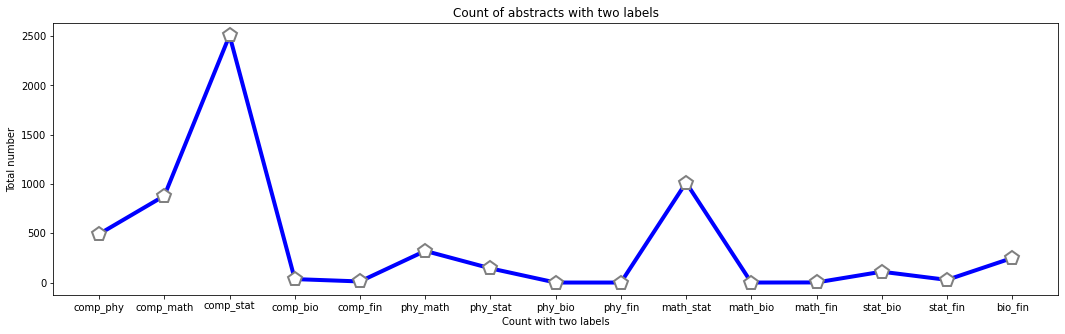

In [16]:
x = ["comp_phy","comp_math","comp_stat","comp_bio","comp_fin", "phy_math", "phy_stat", "phy_bio", "phy_fin", "math_stat", "math_bio", "math_fin", "stat_bio", "stat_fin", "bio_fin"]
y = count_comp_phy[1], count_comp_math[1], count_comp_stat[1], count_comp_bio[1], count_comp_fin[1], count_phy_math[1], count_phy_stat[1], count_phy_bio[1], count_phy_fin[1], count_math_stat[1], count_math_bio[1], count_math_fin[1], count_stat_bio[1], count_stat_fin[1], count_bio_fin[1]
plt.figure(figsize=(18, 5))
plt.plot(x, y, '-p', color='blue',markersize=15, linewidth=4,markerfacecolor='white',markeredgecolor='gray',markeredgewidth=2)
plt.xlabel('Count with two labels')
plt.ylabel('Total number')
plt.title('Count of abstracts with two labels')
plt.show()

## Counting the abstracts with three labels.

In [17]:
dataset['comp_phy_math'] = dataset[['Computer Science', 'Physics', 'Mathematics']].sum(axis=1)
dataset['comp_phy_stat'] = dataset[['Computer Science', 'Physics', 'Statistics']].sum(axis=1)
dataset['comp_phy_bio'] = dataset[['Computer Science', 'Physics', 'Quantitative Biology']].sum(axis=1)
dataset['comp_phy_fin'] = dataset[['Computer Science', 'Physics', 'Quantitative Finance']].sum(axis=1)
dataset['comp_math_stat'] = dataset[['Computer Science', 'Mathematics', 'Statistics']].sum(axis=1)
dataset['comp_math_bio'] = dataset[['Computer Science', 'Mathematics', 'Quantitative Biology']].sum(axis=1)
dataset['comp_math_fin'] = dataset[['Computer Science', 'Mathematics', 'Quantitative Finance']].sum(axis=1)
dataset['comp_stat_bio'] = dataset[['Computer Science', 'Statistics', 'Quantitative Biology']].sum(axis=1)
dataset['comp_stat_fin'] = dataset[['Computer Science', 'Statistics', 'Quantitative Finance']].sum(axis=1)
dataset['comp_fin_bio'] = dataset[['Computer Science', 'Quantitative Finance', 'Quantitative Biology']].sum(axis=1)
dataset['phy_math_stat'] = dataset[['Physics', 'Mathematics', 'Statistics']].sum(axis=1)
dataset['phy_math_bio'] = dataset[['Physics', 'Mathematics', 'Quantitative Biology']].sum(axis=1)
dataset['phy_math_fin'] = dataset[['Physics', 'Mathematics', 'Quantitative Finance']].sum(axis=1)
dataset['phy_stat_bio'] = dataset[['Physics', 'Statistics', 'Quantitative Biology']].sum(axis=1)
dataset['phy_stat_fin'] = dataset[['Physics', 'Statistics',  'Quantitative Finance']].sum(axis=1)
dataset['phy_bio_fin'] = dataset[['Physics', 'Quantitative Biology',  'Quantitative Finance']].sum(axis=1)
dataset['math_stat_bio'] = dataset[['Mathematics', 'Statistics', 'Quantitative Biology']].sum(axis=1)
dataset['math_stat_fin'] = dataset[['Mathematics', 'Statistics', 'Quantitative Finance']].sum(axis=1)
dataset['math_bio_fin'] = dataset[['Mathematics', 'Quantitative Biology', 'Quantitative Finance']].sum(axis=1)
dataset['stat_fin_bio'] = dataset[['Statistics', 'Quantitative Finance', 'Quantitative Biology']].sum(axis=1)

dataset.head(2)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,sum,comp_phy,comp_math,comp_stat,comp_bio,comp_fin,phy_math,phy_stat,phy_bio,phy_fin,math_stat,math_bio,math_fin,stat_bio,stat_fin,bio_fin,comp_phy_math,comp_phy_stat,comp_phy_bio,comp_phy_fin,comp_math_stat,comp_math_bio,comp_math_fin,comp_stat_bio,comp_stat_fin,comp_fin_bio,phy_math_stat,phy_math_bio,phy_math_fin,phy_stat_bio,phy_stat_fin,phy_bio_fin,math_stat_bio,math_stat_fin,math_bio_fin,stat_fin_bio
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0


In [18]:
count_comp_phy_math = dataset[dataset['comp_phy_math'] == 3].count()
count_comp_phy_stat = dataset[dataset['comp_phy_stat'] == 3].count()
count_comp_phy_bio = dataset[dataset['comp_phy_bio'] == 3].count()
count_comp_phy_fin = dataset[dataset['comp_phy_fin'] == 3].count()
count_comp_math_stat = dataset[dataset['comp_math_stat'] == 3].count()
count_comp_math_bio = dataset[dataset['comp_math_bio'] == 3].count()
count_comp_math_fin = dataset[dataset['comp_math_fin'] == 3].count()
count_comp_stat_bio = dataset[dataset['comp_stat_bio'] == 3].count()
count_comp_stat_fin = dataset[dataset['comp_stat_fin'] == 3].count()
count_comp_fin_bio = dataset[dataset['comp_fin_bio'] == 3].count()
count_phy_math_stat = dataset[dataset['phy_math_stat'] == 3].count()
count_phy_math_bio = dataset[dataset['phy_math_bio'] == 3].count()
count_phy_math_fin = dataset[dataset['phy_math_fin'] == 3].count()
count_phy_stat_bio = dataset[dataset['phy_stat_bio'] == 3].count()
count_phy_stat_fin = dataset[dataset['phy_stat_fin'] == 3].count()
count_phy_bio_fin = dataset[dataset['phy_bio_fin'] == 3].count()
count_math_stat_bio = dataset[dataset['math_stat_bio'] == 3].count()
count_math_stat_fin = dataset[dataset['math_stat_fin'] == 3].count()
count_math_bio_fin = dataset[dataset['math_bio_fin'] == 3].count()
count_stat_fin_bio = dataset[dataset['stat_fin_bio'] == 3].count()



*   Plotting a pie chart for visualising the abstracts with three labels.
*   The pie charts depicts that computer science-mathematics-statistics has the highest number of abstracts.



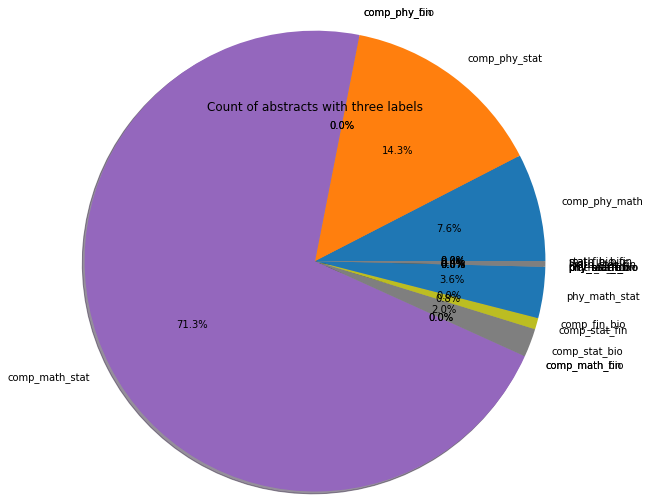

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ["comp_phy_math", "comp_phy_stat", "comp_phy_bio", "comp_phy_fin", "comp_math_stat", "comp_math_bio", "comp_math_fin", "comp_stat_bio", "comp_stat_fin", "comp_fin_bio", "phy_math_stat", "phy_math_bio", "phy_math_fin", "phy_stat_bio", "phy_stat_fin", "phy_bio_fin", "math_stat_bio", "math_stat_fin", "math_bio_fin", "stat_fin_bio"]
y = count_comp_phy_math[1], count_comp_phy_stat[1], count_comp_phy_bio[1], count_comp_phy_fin[1], count_comp_math_stat[1], count_comp_math_bio[1], count_comp_math_fin[1], count_comp_stat_bio[1], count_comp_stat_fin[1], count_comp_fin_bio[1], count_phy_math_stat[1], count_phy_math_bio[1], count_phy_math_fin[1], count_phy_stat_bio[1], count_phy_stat_fin[1], count_phy_bio_fin[1], count_math_stat_bio[1], count_math_stat_fin[1], count_math_bio_fin[1], count_stat_fin_bio[1]
#ax.bar(x,y)
plt.pie(y, labels=x, autopct='%1.1f%%', radius=2, shadow=True)
ax.set_title("Count of abstracts with three labels")
plt.show()



*   Since the above pie chart shows that there are alot of abstracts without three labels and so there is overlapping in the graph.


*   So from the above graph the enteries without three labels were deleted and the remaining has been plotted below.
*   from the graph its very much clear that computer science-mathematics-statistcs has highest abstract count.





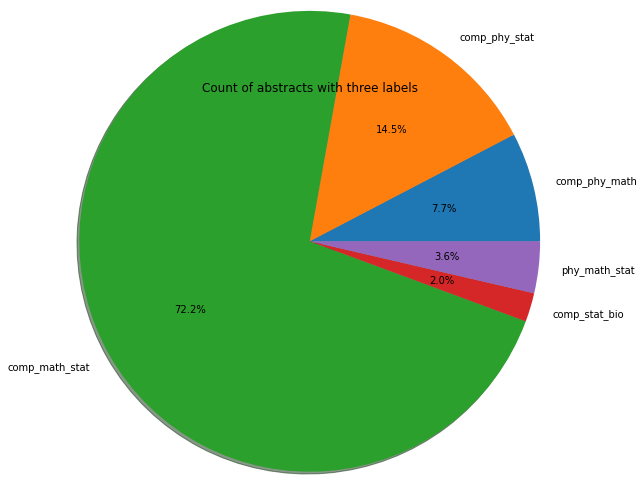

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ["comp_phy_math", "comp_phy_stat", "comp_math_stat", "comp_stat_bio", "phy_math_stat"]
y = count_comp_phy_math[1], count_comp_phy_stat[1], count_comp_math_stat[1], count_comp_stat_bio[1], count_phy_math_stat[1]
#ax.bar(x,y)
plt.pie(y, labels=x, autopct='%1.1f%%', radius=2, shadow=True)
ax.set_title("Count of abstracts with three labels")
plt.show()



*   To make it more clear the count of abstracts with three labels has also been plotted as a line graph.
*   This will give an understanding of the abstracts with and without three labels.



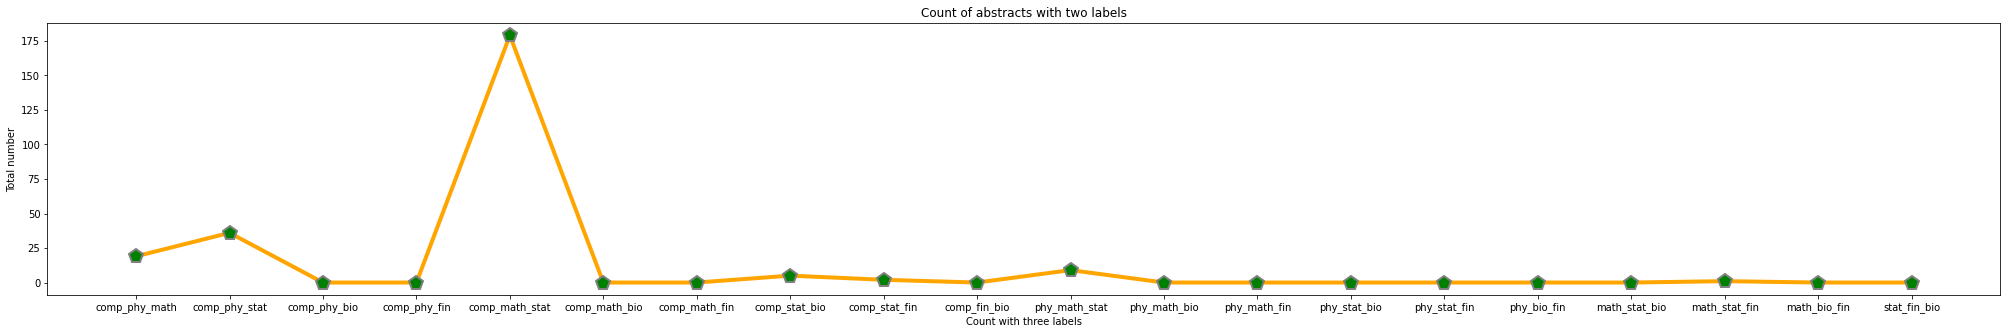

In [21]:
x = ["comp_phy_math", "comp_phy_stat", "comp_phy_bio", "comp_phy_fin", "comp_math_stat", "comp_math_bio", "comp_math_fin", "comp_stat_bio", "comp_stat_fin", "comp_fin_bio", "phy_math_stat", "phy_math_bio", "phy_math_fin", "phy_stat_bio", "phy_stat_fin", "phy_bio_fin", "math_stat_bio", "math_stat_fin", "math_bio_fin", "stat_fin_bio"]
y = count_comp_phy_math[1], count_comp_phy_stat[1], count_comp_phy_bio[1], count_comp_phy_fin[1], count_comp_math_stat[1], count_comp_math_bio[1], count_comp_math_fin[1], count_comp_stat_bio[1], count_comp_stat_fin[1], count_comp_fin_bio[1], count_phy_math_stat[1], count_phy_math_bio[1], count_phy_math_fin[1], count_phy_stat_bio[1], count_phy_stat_fin[1], count_phy_bio_fin[1], count_math_stat_bio[1], count_math_stat_fin[1], count_math_bio_fin[1], count_stat_fin_bio[1]
plt.figure(figsize=(35, 5))
plt.plot(x, y, '-p', color='orange',markersize=15, linewidth=4,markerfacecolor='green',markeredgecolor='gray',markeredgewidth=2)
plt.xlabel('Count with three labels')
plt.ylabel('Total number')
plt.title('Count of abstracts with two labels')
plt.show()

## Length of abstracts

In [22]:
dataset["len_abst"] = dataset["ABSTRACT"].apply(len)
dataset.head(2)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,sum,comp_phy,comp_math,comp_stat,comp_bio,comp_fin,phy_math,phy_stat,phy_bio,phy_fin,math_stat,math_bio,math_fin,stat_bio,stat_fin,bio_fin,comp_phy_math,comp_phy_stat,comp_phy_bio,comp_phy_fin,comp_math_stat,comp_math_bio,comp_math_fin,comp_stat_bio,comp_stat_fin,comp_fin_bio,phy_math_stat,phy_math_bio,phy_math_fin,phy_stat_bio,phy_stat_fin,phy_bio_fin,math_stat_bio,math_stat_fin,math_bio_fin,stat_fin_bio,len_abst
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1912
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,513




*   Plotting a histogram to represent the length of each abstract.
*   From the graph we can say that the highest length is close to 600.



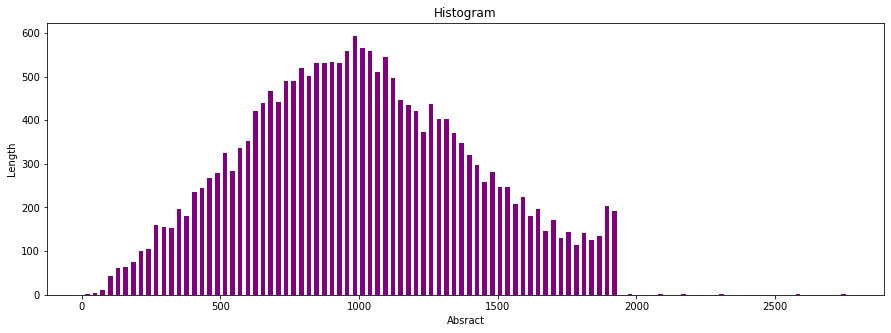

In [23]:
y = dataset["len_abst"]
plt.figure(figsize=(15, 5))
plt.hist(y, bins=100, histtype='bar', rwidth=0.6, color='purple')
plt.xlabel("Absract")
plt.ylabel("Length")
plt.title("Histogram")
plt.show()